# Long Assignment -  Improve sales of a company that sells luxury items
## Introduction to Data Science

Maria Bessa - up201704601

João Cunha - up202103227

<div id= "toc"/>

## Table of Contents
 ### 1. [Introduction](#Introduction)
 ### 2. [Business Understanding](#BusinessUnderstanding)
 ### 3. [Data Understanding](#DataUnderstanding)
  #### [Numerical Variables](#Numerical)
  #### [Categorical Variables](#Categorical)
  #### [Summary of the data understanding](#Summary)
 ### 4. [Data Preparation](#DataPreparation)
 ### 5. [Modeling](#Modeling)
  #### [Full Dataset](#Full)
  #### [Balanced Dataset](#Balanced)
  #### [Comparison of models](#Comparison)
 ### 6. [Evaluation and Main Conclusions](#EvalConcl)
 ### 7. [Bonus](#Bonus)

<div id= 'Introduction'/>

# 1. Introduction
The data to be used has been collected by a company during its operation. The company sells luxury items
through its website and wants to improve success in its sales and better understand the behavior of the
customers/users. For each user interaction, the company records values for a number of attributes possibly
related to the success of the sale in a given e-commerce session. When the client buys the product, the
variable bought has value 1, otherwise it is 0. A number of other variables describe the session.

<div id= 'BusinessUnderstanding'/>

# 2. Business Understanding
We approached this data science problem by following the CRISP-DM methodology.

The Cross Industry Standard Process for Data Mining (CRISP-DM) is a process model used with six phases that naturally describes the data science life cycle. It’s like a set of guardrails to help us plan, organize, and implement our data science (or machine learning) project. The first phase of this model is **business understanding** - **What does the business need?** 

**Determine business objectives:** We were given a dataset from a company that sells luxury items. This dataset has information and data about the company's customers (possibly correlated with sales success). We chose has our target the variable **bought**. The variable **bought** can only assume 2 values, therefore, this is a **binary classification problem**. 

**Business objective:** the company wants to improve success in its sales and understand the behavior of its customers.

**Assess the situation:** data in csv format collected by the company.

**Determine data mining goals:** Our target is a binary variable ('bought'), so this is a binary classification machine learning type of task. We want to obtain a model that will help us predict if a luxury item has been bought or not.

<div id= 'DataUnderstanding'/>

# 3. Data Understanding
Next is the Data Understanding phase. This step drives the focus to identify, collect, and analyze the data sets that can help us accomplish the project goals.

**Collect initial data:** The data was provided by the professors, so, it was not necessary to collect it ourselves.

First, we import the necessary libraries for proper data analysis and beyond. Then, we import the full dataset. We will only do the data understanding part of the full dataset since the balanced dataset was already worked on by the professors.

In [1]:
#Majority of the libraries we used for the whole assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,r2_score,precision_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

df_full = pd.read_csv("/Users/maria/Downloads/train_full.csv")

**Describing and exploring data:**

In [2]:
df_full

,Unnamed: 0,session_id,plaform,segment,customer_type,device_group,visitor_type,has_listing,has_used_search,has_recommendation,...,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,is_subscribed,browser_name,country,bought
0,0,aae4be18-e8f9-41c6-8906-6fa41cd83f8a,website,without_segment,prospect,Mobile Web,new,1,0,0,...,0,0,1,0,0,1,NaN,Safari,US,0
1,1,62175cec-8acd-420c-ba11-0082901d6333,website,without_segment,prospect,Mobile Web,returning,0,0,1,...,0,0,1,1,1,1,NaN,Chrome,MX,0
2,2,e45c3886-bfeb-45c5-8d3f-00011d89a767,mobile_app,FFACCESS-Bronze,customer,App,returning,1,0,1,...,0,27,10,1,1,1,No,NaN,RU,0
3,3,9fd5e56c-24e9-4974-9d69-e3509922d80d,mobile_app,without_segment,customer,App,returning,1,0,0,...,0,88,15,5,1,1,Yes,NaN,RU,0
4,4,ddebea0b-a83f-459f-b0c4-d17efe4df69f,website,without_segment,prospect,Mobile Web,new,0,0,0,...,0,0,1,1,1,1,NaN,Instagram App,US,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,99995,986cf576-3a4f-414b-94d3-33a693e848d9,mobile_app,FFACCESS-Gold,customer,App,returning,1,0,0,...,1,2182,43,3,1,1,Yes,NaN,HK,1
94996,99996,1f36d141-b47b-478c-9210-264b9b373343,website,FFACCESS-Platinum,customer,Mobile Web,returning,1,1,1,...,1,2040,48,11,3,7,Yes,Safari,FR,1
94997,99997,074f1f08-3549-4e7a-90a1-0c4f6444d451,website,FFACCESS-Silver,customer,Desktop,returning,0,0,1,...,0,1118,8,0,0,0,No,Chrome,US,1
94998,99998,275f7cae-387d-4933-84bf-3d4218519c8a,website,without_segment,prospect,Mobile Web,new,1,0,1,...,1,3798,43,8,2,3,Yes,Safari,US,1


Our dataset has 95000 rows and 21 columns (variables).

In [45]:
# check for columns with only NaNs
print("There are {} columns containing only NaN values.".format(df_full.isnull().all().sum()))

There are 0 columns containing only NaN values.


In [46]:
#Checking for missing values
df_full.isnull().sum()

Unnamed: 0                        0
session_id                        0
plaform                           0
segment                           0
customer_type                     0
device_group                      0
visitor_type                      0
has_listing                       0
has_used_search                   0
has_recommendation                0
has_add_to_wishlist               0
has_add_to_bag                    0
duration                          0
view_qty                          0
unique_product_qty                0
unique_browse_designer_qty        0
unique_browse_category_qty        0
is_subscribed                 67313
browser_name                  26232
country                           4
bought                            0
dtype: int64

<div id= 'Numerical'/>

## Numerical variables

## duration
Session duration in seconds

In [47]:
print('Missing values:',len(df_full[df_full.duration.isnull()]))
print('Values of 0:',len(df_full[df_full.duration==0]))
print('Percentage of values of 0 and missing values:',
      round((len(df_full[df_full.duration.isnull()]) + len(df_full[df_full.duration==0]))*100/len(df_full),1),'%')
print('Negative values: ', len(df_full[df_full.duration<0]))
print('\n',df_full.duration.describe())

Missing values: 0
Values of 0: 41417
Percentage of values of 0 and missing values: 43.6 %
Negative values:  0

 count    95000.000000
mean       332.473663
std        868.827560
min          0.000000
25%          0.000000
50%         15.000000
75%        223.000000
max      20295.000000
Name: duration, dtype: float64


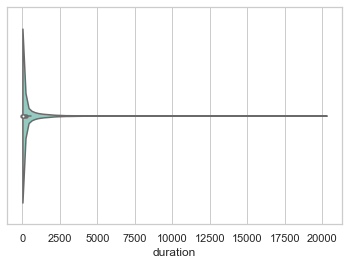

In [48]:
ax = sns.violinplot(x="duration",
                    data=df_full[(df_full.duration>=0)],
                    cut=0, scale="width", palette="Set3")
plt.show()

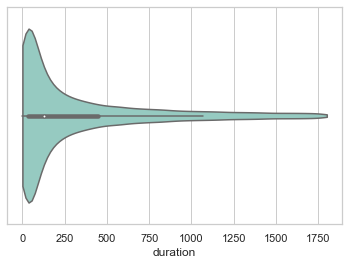

In [52]:
ax = sns.violinplot(x="duration",
                    data=df_full[(df_full.duration>0) & (df_full.duration<=1800)],
                    cut=0, scale="width", palette="Set3")
plt.show()

The second plot looks way better than the first one because we chose a reasonable interval for the duration of sessions. It's a little absurd to have sessions with zero seconds. A session that lasted 0 seconds does not bring any valuable information.

## view_qty
Number of views in the session

In [53]:
print('Missing values:',len(df_full[df_full.view_qty.isnull()]))
print('Values of 0:',len(df_full[df_full.view_qty==0]))
print('Percentage of values of 0 and missing values:',
      round((len(df_full[df_full.view_qty.isnull()]) + len(df_full[df_full.view_qty==0]))*100/len(df_full),1),'%')
print('Negative values: ', len(df_full[df_full.view_qty<0]))
print('\n',df_full.view_qty.describe())

Missing values: 0
Values of 0: 0
Percentage of values of 0 and missing values: 0.0 %
Negative values:  0

 count    95000.000000
mean        10.972179
std         31.213357
min          1.000000
25%          1.000000
50%          2.000000
75%          8.000000
max       1151.000000
Name: view_qty, dtype: float64


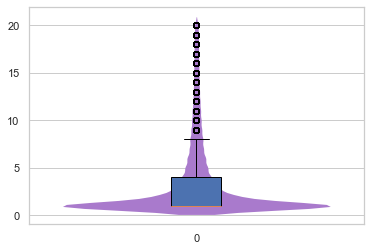

In [54]:
fig, ax = plt.subplots()
sns.violinplot(data=df_full[df_full.view_qty<=20].view_qty, color="#af52f4", inner=None, linewidth=0, saturation=0.5)
ax.boxplot(df_full[df_full.view_qty<=20].view_qty, positions=np.array([0]), patch_artist=True)
plt.show()

## unique_product_qty
Number of distinct product page views within the session

In [55]:
print('Missing values:',len(df_full[df_full.unique_product_qty.isnull()]))
print('Values of 0:',len(df_full[df_full.unique_product_qty==0]))
print('Percentage of values of 0 and missing values:',
      round((len(df_full[df_full.unique_product_qty.isnull()]) + len(df_full[df_full.unique_product_qty==0]))*100/len(df_full),1),'%')
print('Negative values: ', len(df_full[df_full.unique_product_qty<0]))
print('\n',df_full.unique_product_qty.describe())

Missing values: 0
Values of 0: 28829
Percentage of values of 0 and missing values: 30.3 %
Negative values:  0

 count    95000.000000
mean         2.766547
std          8.493634
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        416.000000
Name: unique_product_qty, dtype: float64


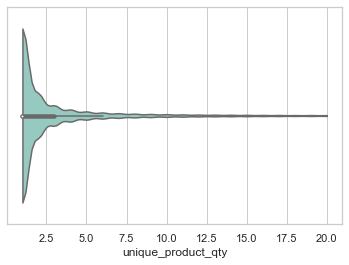

In [57]:
ax = sns.violinplot(x="unique_product_qty",
                    data=df_full[(df_full.unique_product_qty>0) & (df_full.unique_product_qty<=20)],
                    cut=0, scale="width", palette="Set3")
plt.show()

## unique_browse_designer_qty
Number of distinct designer_id within the session

In [58]:
print('Missing values:',len(df_full[df_full.unique_browse_designer_qty.isnull()]))
print('Values of 0:',len(df_full[df_full.unique_browse_designer_qty==0]))
print('Percentage of values of 0 and missing values:',
      round((len(df_full[df_full.unique_browse_designer_qty.isnull()]) + len(df_full[df_full.unique_browse_designer_qty==0]))*100/len(df_full),1),'%')
print('Negative values: ', len(df_full[df_full.unique_browse_designer_qty<0]))
print('\n',df_full.unique_browse_designer_qty.describe())

Missing values: 0
Values of 0: 14778
Percentage of values of 0 and missing values: 15.6 %
Negative values:  0

 count    95000.000000
mean         1.676105
std          3.374039
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        158.000000
Name: unique_browse_designer_qty, dtype: float64


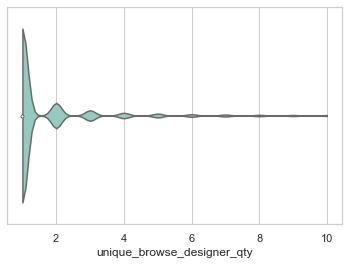

In [60]:
ax = sns.violinplot(x="unique_browse_designer_qty",
                    data=df_full[(df_full.unique_browse_designer_qty>0) & (df_full.unique_browse_designer_qty<=10)],
                    cut=0, scale="width", palette="Set3")
plt.show()

## unique_browse_category_qty
Number of distinct category_id within the session

In [61]:
print('Missing values:',len(df_full[df_full.unique_browse_category_qty.isnull()]))
print('Values of 0:',len(df_full[df_full.unique_browse_category_qty==0]))
print('Percentage of values of 0 and missing values:',
      round((len(df_full[df_full.unique_browse_category_qty.isnull()]) + len(df_full[df_full.unique_browse_category_qty==0]))*100/len(df_full),1),'%')
print('Negative values: ', len(df_full[df_full.unique_browse_category_qty<0]))
print('\n',df_full.unique_browse_category_qty.describe())

Missing values: 0
Values of 0: 22498
Percentage of values of 0 and missing values: 23.7 %
Negative values:  0

 count    95000.000000
mean         1.166042
std          1.353135
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         84.000000
Name: unique_browse_category_qty, dtype: float64


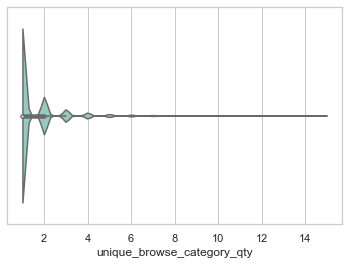

In [62]:
ax = sns.violinplot(x="unique_browse_category_qty",
                    data=df_full[(df_full.unique_browse_category_qty>0) & (df_full.unique_browse_category_qty<=15)],
                    cut=0, scale="width", palette="Set3")
plt.show()

 <div id= 'Categorical'/>
 
 ## Categorical variables

## customer_type
Identifies if a user has purchased before (customer/prospect)

prospect    75529
customer    19471
Name: customer_type, dtype: int64


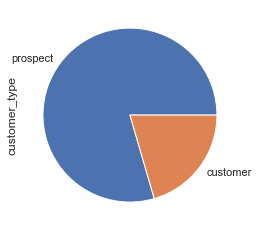

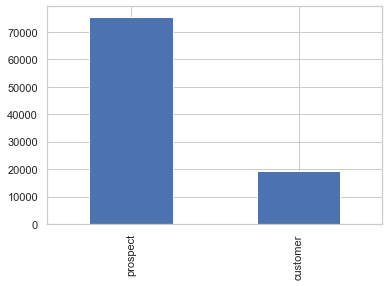

In [65]:
print(df_full.customer_type.value_counts(dropna=False))
df_full.customer_type.value_counts(dropna=False).plot.pie()
plt.show()
df_full.customer_type.value_counts(dropna=False).plot.bar()
plt.show()

## device_group
Device Group (app/mobile web/desktop/etc.)

Mobile Web    52567
App           26232
Desktop       16201
Name: device_group, dtype: int64


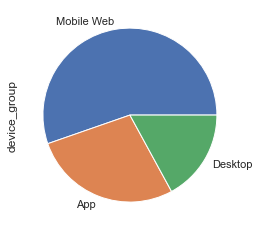

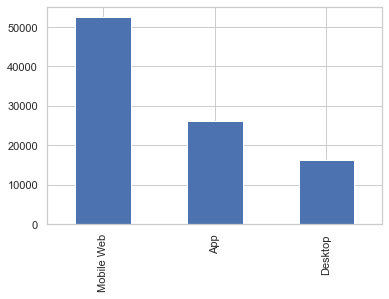

In [66]:
print(df_full.device_group.value_counts(dropna=False))
df_full.device_group.value_counts(dropna=False).plot.pie()
plt.show()
df_full.device_group.value_counts(dropna=False).plot.bar()
plt.show()

We also have another variable called **"plaform"** that basically refers to the same thing as the device_group but has one less feature.

website       68768
mobile_app    26232
Name: plaform, dtype: int64


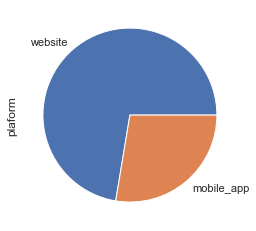

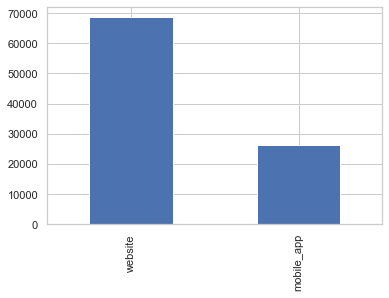

In [67]:
print(df_full.plaform.value_counts(dropna=False))
df_full.plaform.value_counts(dropna=False).plot.pie()
plt.show()
df_full.plaform.value_counts(dropna=False).plot.bar()
plt.show()

## visitor_type
If the device is new in the company platform

new          48592
returning    46408
Name: visitor_type, dtype: int64


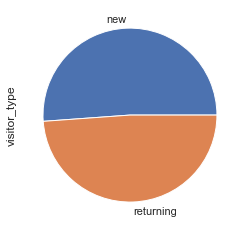

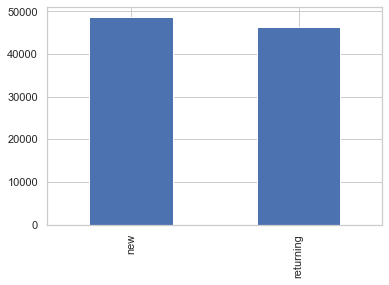

In [68]:
print(df_full.visitor_type.value_counts(dropna=False))
df_full.visitor_type.value_counts(dropna=False).plot.pie()
plt.show()
df_full.visitor_type.value_counts(dropna=False).plot.bar()
plt.show()

## has_listing
Flag that indicates if the session has a listing view

1    50021
0    44979
Name: has_listing, dtype: int64


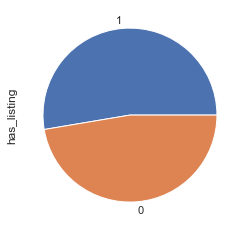

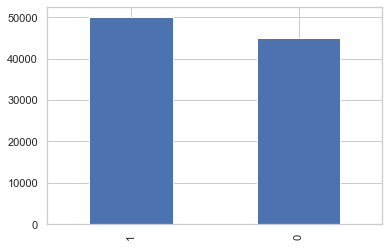

In [69]:
print(df_full.has_listing.value_counts(dropna=False))
df_full.has_listing.value_counts(dropna=False).plot.pie()
plt.show()
df_full.has_listing.value_counts(dropna=False).plot.bar()
plt.show()

## has_used_search
Flag that indicates if the session has a search view

0    80466
1    14534
Name: has_used_search, dtype: int64


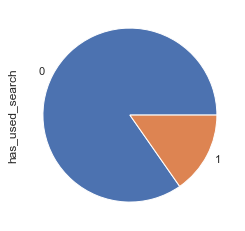

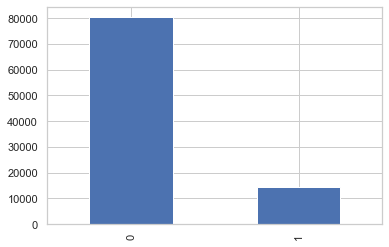

In [70]:
print(df_full.has_used_search.value_counts(dropna=False))
df_full.has_used_search.value_counts(dropna=False).plot.pie()
plt.show()
df_full.has_used_search.value_counts(dropna=False).plot.bar()
plt.show()

## has_recommendation 
Flag that indicates if the session has a recommendation view

0    65594
1    29406
Name: has_recommendation, dtype: int64


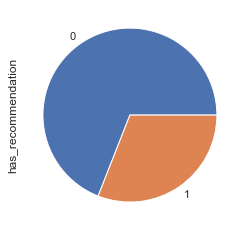

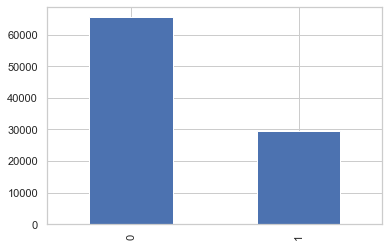

In [71]:
print(df_full.has_recommendation.value_counts(dropna=False))
df_full.has_recommendation.value_counts(dropna=False).plot.pie()
plt.show()
df_full.has_recommendation.value_counts(dropna=False).plot.bar()
plt.show()

## has_add_to_wishlist 
Flag that indicates if the session has an add_to_wishlist view

0    90468
1     4532
Name: has_add_to_wishlist, dtype: int64


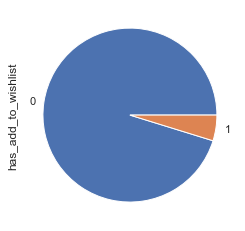

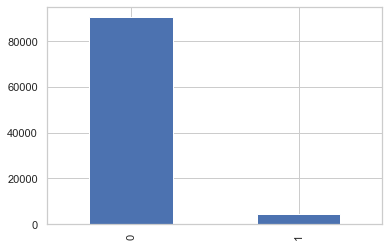

In [72]:
print(df_full.has_add_to_wishlist.value_counts(dropna=False))
df_full.has_add_to_wishlist.value_counts(dropna=False).plot.pie()
plt.show()
df_full.has_add_to_wishlist.value_counts(dropna=False).plot.bar()
plt.show()

## has_add_to_bag
Flag that indicates if the session has an add_to_bag view

0    84191
1    10809
Name: has_add_to_bag, dtype: int64


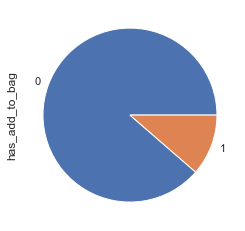

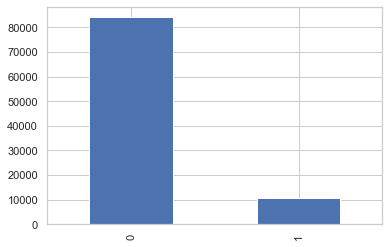

In [73]:
print(df_full.has_add_to_bag.value_counts(dropna=False))
df_full.has_add_to_bag.value_counts(dropna=False).plot.pie()
plt.show()
df_full.has_add_to_bag.value_counts(dropna=False).plot.bar()
plt.show()

## is_subscribed
If the user is subscribed in the newsletter

NaN        67313
Yes        18640
No          9004
Unknown       43
Name: is_subscribed, dtype: int64


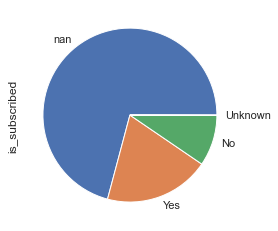

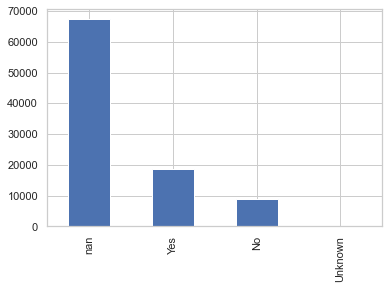

In [74]:
print(df_full.is_subscribed.value_counts(dropna=False))
df_full.is_subscribed.value_counts(dropna=False).plot.pie()
plt.show()
df_full.is_subscribed.value_counts(dropna=False).plot.bar()
plt.show()

## browser_name 
User agent browser name

Safari                     28487
NaN                        26232
Chrome                     22085
Instagram App               4448
Facebook App                3553
Google App                  1928
Samsung Browser             1570
Mobile Safari UIWebView     1317
Firefox                     1240
Edge                        1126
Yandex Browser               961
Opera                        783
Android WebView              590
HuaweiBrowser                120
Miui Browser                 111
Apple Mail                    62
WeChat App                    54
Snapchat                      39
Opera Mobile                  37
Firefox for iOS               34
Line App                      32
DuckDuckGo Browser            27
Naver                         23
Whale Browser                 17
UC Browser                    17
Sogou Explorer                15
Weibo                         14
Vivo Browser                  13
Default Browser               11
Silk                          10
QQBrowser 

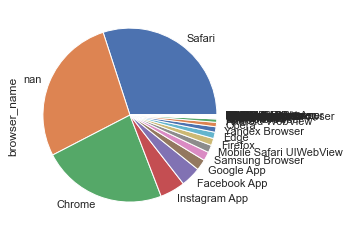

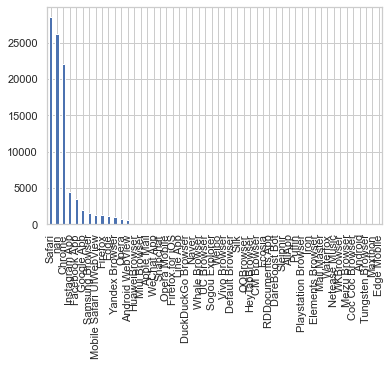

In [75]:
print(df_full.browser_name.value_counts(dropna=False))
df_full.browser_name.value_counts(dropna=False).plot.pie()
plt.show()
df_full.browser_name.value_counts(dropna=False).plot.bar()
plt.show()

## country
Session client country

US    15772
RU    14418
BR     6046
GB     5874
IT     4152
      ...  
BJ        1
TC        1
AQ        1
LC        1
GM        1
Name: country, Length: 163, dtype: int64


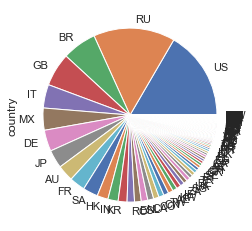

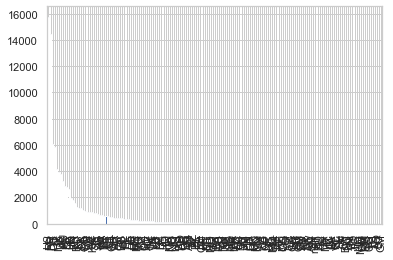

In [76]:
print(df_full.country.value_counts(dropna=False))
df_full.country.value_counts(dropna=False).plot.pie()
plt.show()
df_full.country.value_counts(dropna=False).plot.bar()
plt.show()

In [78]:
print(df_full.country.unique())

['US' 'MX' 'RU' 'AU' 'IN' 'PT' 'KR' 'CL' 'GB' 'AE' 'CN' 'HK' 'DE' 'GR'
 'PL' 'KW' 'LI' 'BR' 'AT' 'HR' 'CA' 'IT' 'SA' 'TW' 'ZA' 'VN' 'JP' 'FR'
 'RO' 'QA' 'ME' 'BH' 'ID' 'PE' 'ES' 'BE' 'PK' 'LB' 'IE' 'KZ' 'BG' 'PH'
 'NL' 'AR' 'IL' 'SE' 'NZ' 'GE' 'DO' 'DK' 'BY' 'AF' 'MD' 'TH' 'MY' 'UA'
 'LT' 'CH' 'EG' 'NO' 'CO' 'SG' 'BA' 'RS' 'KH' 'HU' 'MO' 'IS' 'OM' 'AM'
 'UY' 'MA' 'NG' 'AL' 'BB' 'EE' 'DZ' 'MK' 'SK' 'LU' 'AO' 'TR' 'PA' 'EC'
 'JO' 'IQ' 'BD' 'GH' 'CY' 'SI' 'AZ' 'CZ' 'MU' 'KG' 'MT' 'BN' 'FI' 'TN'
 'LV' 'CR' 'BS' 'SV' 'UZ' 'GT' 'AD' 'NP' 'HN' 'CM' 'KE' 'ET' 'AI' 'MC'
 'GP' 'JM' nan 'MW' 'SN' 'VE' 'VI' 'CI' 'MR' 'ZM' 'AW' 'CG' 'LK' 'PR' 'GU'
 'JE' 'GG' 'BM' 'SR' 'GI' 'TT' 'GY' 'BW' 'AQ' 'MN' 'MQ' 'HT' 'LC' 'SM'
 'GF' 'KY' 'BO' 'SL' 'LA' 'IC' 'KV' 'VC' 'TC' 'BJ' 'MZ' 'LS' 'RE' 'NC'
 'DM' 'MV' 'UG' 'TG' 'GL' 'PY' 'NI' 'GM']


## bought
Flag that indicates if the session has an order

0    87000
1     8000
Name: bought, dtype: int64


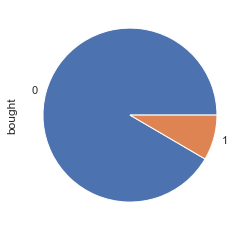

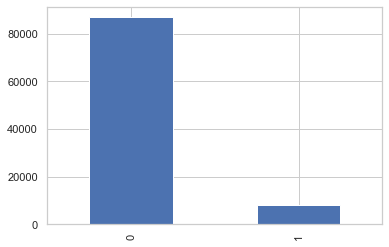

In [79]:
print(df_full.bought.value_counts(dropna=False))
df_full.bought.value_counts(dropna=False).plot.pie()
plt.show()
df_full.bought.value_counts(dropna=False).plot.bar()
plt.show()

### Correlation between variables

In [82]:
df_full.customer_type.replace('prospect',0,inplace=True)
df_full.customer_type.replace('customer',1,inplace=True)

df_full.visitor_type.replace('returning',0,inplace=True)
df_full.visitor_type.replace('new',1,inplace=True)

df_full.plaform.replace('website',0,inplace=True)
df_full.plaform.replace('mobile_app',1,inplace=True)

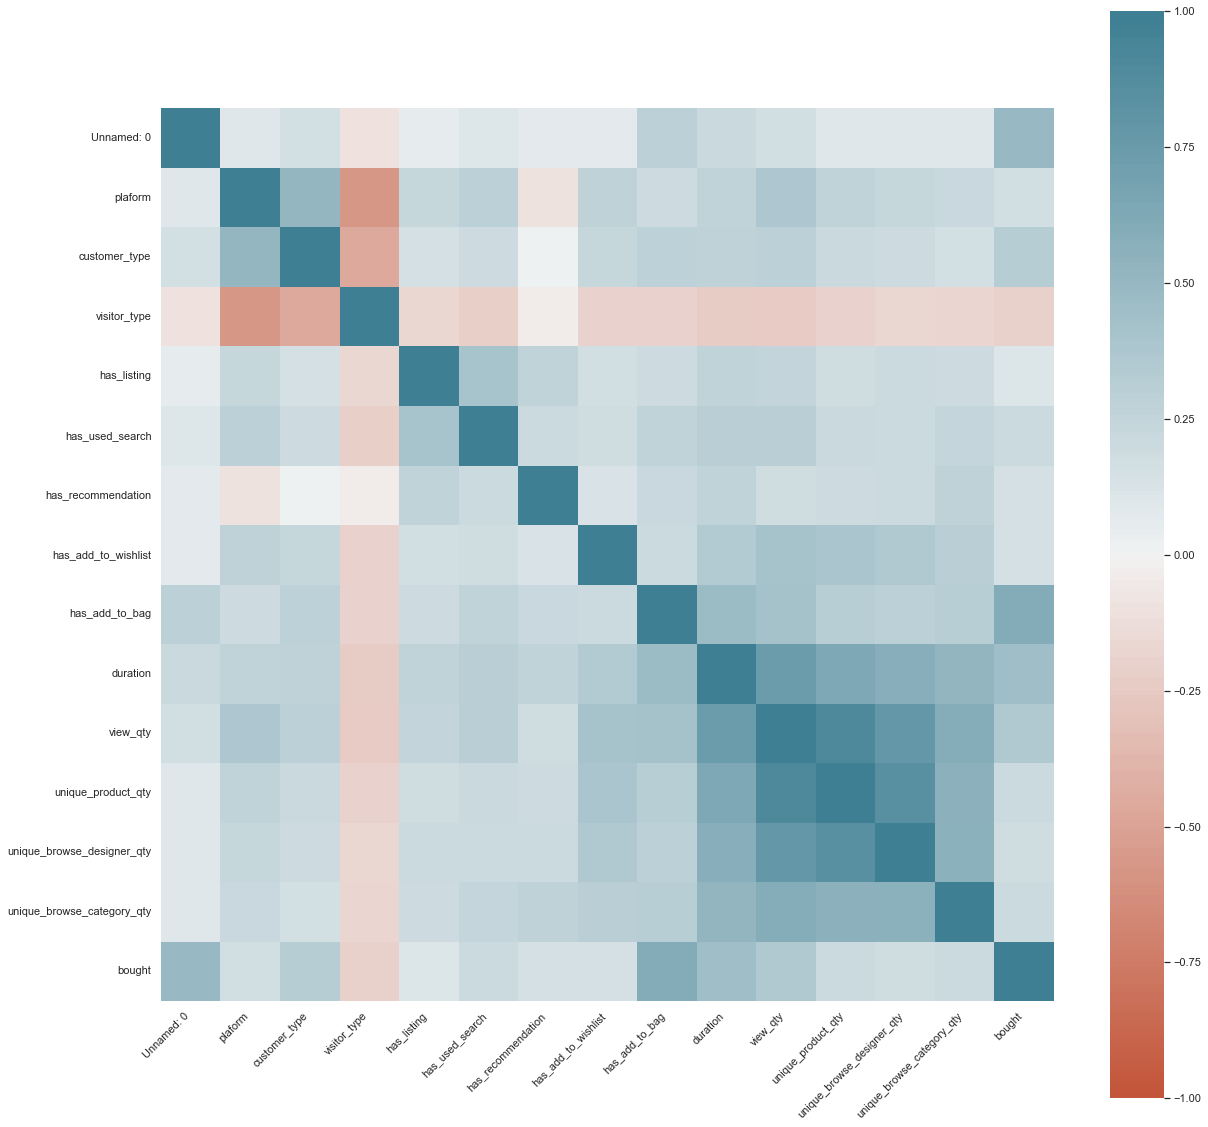

In [83]:
#Correlation Matrix

fig, ax = plt.subplots(figsize=(20,20))
corr = df_full.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [86]:
#using the Spearman correlation method since does not need any assumption regarding the features' distribution.
corr_mat = df_full.corr(method='spearman')
corr_mat[(corr_mat >= 0.5) & (corr_mat < 1)]\
    .dropna(how='all', axis=0)\
    .dropna(how='all', axis=1)

,plaform,customer_type,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,bought
plaform,NaN,0.515519,NaN,NaN,0.600032,NaN,NaN,NaN,NaN
customer_type,0.515519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_add_to_bag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600878
duration,NaN,NaN,NaN,NaN,0.950167,0.587136,NaN,0.508683,NaN
view_qty,0.600032,NaN,NaN,0.950167,NaN,0.602942,0.502834,0.516855,NaN
unique_product_qty,NaN,NaN,NaN,0.587136,0.602942,NaN,0.757129,0.805163,NaN
unique_browse_designer_qty,NaN,NaN,NaN,NaN,0.502834,0.757129,NaN,0.674360,NaN
unique_browse_category_qty,NaN,NaN,NaN,0.508683,0.516855,0.805163,0.674360,NaN,NaN
bought,NaN,NaN,0.600878,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
correlation = pd.DataFrame(
    {'spearman_corr': [df_full.bought.corr(df_full[col], method='spearman') for col in df_full.columns]},
    index=[col for col in df_full.columns]
)
correlation.loc[(abs(correlation.spearman_corr) >= 0.5) & (abs(correlation.spearman_corr) < 1)]

,spearman_corr
has_add_to_bag,0.600878


<div id= 'Summary'/>

## Summary of the data understanding

Of the 21 columns that make up this dataset, they contain variables of 3 types:

**Binary variables:** plaform, customer_type, visitor_type, has_listing, has_used_search, has_recommendation, has_add_to_wishlist, has_add_to_bag, is_subscribed and bought

**Nominal variables:** country, browser_name, device_group, segment and session_id

**Numerical variables:** duration, view_qty, unique_product_qty, unique_browse_designer_qty and unique_browse_category_qty
    
Throughout this work, we graphically visualized the data, using typical functions of the Python language, facilitating the evaluation and analysis of the dataset provided.

The presence of outliers and less plausible values were notable.

Only three of the variables have **missing values**, these being **'is_subscribed' (70% of NaN values), 'browser_name' (almost 30% of NaN values), and 'country' (4 NaN values)**.

The variables **'duration', 'unique_product_qty', 'unique_browse_designer_qty' and 'unique_browse_category_qty' have a lot of values of zero.** 'duration' being the most problematic one since it has 43.6% of values that are zeros. We considered treating or possibly removing those values.


<div id= 'DataPreparation'/>

# 4. Data Preparation

#### How do we organize data for modeling?

After analyzing the variables and seeing what relationships could be established between them so that we could build adequate models for their evaluation, here's what we did:

**Unnamed: 0** and **session_id:** removed as they do not reflect anything interesting or valuable considering the objective of this work.

**is_subscribed:** removed because it has about 70% of missing values.

**browser_name:** removed because it has almost 30% of missing values. 30% isn't as bad as 70% but since this variable has no significant correlation with our target variable 'bought', we decided to remove it to facilitate our work.

**country:** removed because there are too many countries that only appear once.

**segment:** removed because there are too many "without_segment" and this variable wasn't mentioned by the professors in the guidelines.

**device_group:** removed only because we found the variable 'plaform' in our dataset that basically has the same information and only two features, which makes our job easier!


**platform**, **customer_type** and **visitor_type:** were encoded. 

platform: website - 1; mobile_app - 0

customer_type: prospect - 1; customer - 0

visitor_type: new - 0; returning - 1

Renamed 'plaform' to **'platform'**.

- We created a copy of the full dataset so we could go back to the original dataset in case something went wrong.

In [3]:
df_full_copy=df_full.copy()

In [4]:
df_full_copy = df_full_copy.drop(columns=["browser_name","country", "is_subscribed", "session_id", "device_group","segment","Unnamed: 0"])
#We dropped browser_name and is_subscribed because they have too many nan values.
#Dropping country because there are to many countries that only appear once
#Dropping segment because there are too many "without_segment"
#Dropping session_id and Unnamed: 0 because they bring no valuable info
#Dropping device_group because plaform basically has the same info and only two features

In [91]:
df_full_copy

,plaform,customer_type,visitor_type,has_listing,has_used_search,has_recommendation,has_add_to_wishlist,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,bought
0,0,0,1,1,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,1,1,1,0
2,1,1,0,1,0,1,0,0,27,10,1,1,1,0
3,1,1,0,1,0,0,1,0,88,15,5,1,1,0
4,0,0,1,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,1,1,0,1,0,0,1,1,2182,43,3,1,1,1
94996,0,1,0,1,1,1,0,1,2040,48,11,3,7,1
94997,0,1,0,0,0,1,0,0,1118,8,0,0,0,1
94998,0,0,1,1,0,1,0,1,3798,43,8,2,3,1


**Checking for missing values**

After eliminating some values from the dataset, we check for missing values.

In [92]:
df_full_copy.isna().sum()
#We have no nan values so there is no need to handle missing values

plaform                       0
customer_type                 0
visitor_type                  0
has_listing                   0
has_used_search               0
has_recommendation            0
has_add_to_wishlist           0
has_add_to_bag                0
duration                      0
view_qty                      0
unique_product_qty            0
unique_browse_designer_qty    0
unique_browse_category_qty    0
bought                        0
dtype: int64

In [5]:
df_full_copy.rename(columns= {'plaform': 'platform'},inplace=True)

In [6]:
df_full_copy

,platform,customer_type,visitor_type,has_listing,has_used_search,has_recommendation,has_add_to_wishlist,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,bought
0,website,prospect,new,1,0,0,0,0,0,1,0,0,1,0
1,website,prospect,returning,0,0,1,0,0,0,1,1,1,1,0
2,mobile_app,customer,returning,1,0,1,0,0,27,10,1,1,1,0
3,mobile_app,customer,returning,1,0,0,1,0,88,15,5,1,1,0
4,website,prospect,new,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,mobile_app,customer,returning,1,0,0,1,1,2182,43,3,1,1,1
94996,website,customer,returning,1,1,1,0,1,2040,48,11,3,7,1
94997,website,customer,returning,0,0,1,0,0,1118,8,0,0,0,1
94998,website,prospect,new,1,0,1,0,1,3798,43,8,2,3,1


**Encoding categorical variables**

Before the modeling step, we need all of our variables to be numeric. 
We used a **dummy encoder** (which is a kind of one hot encoder that eliminates redundancies). Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. This type of encoding uses N-1 features to represent N labels/categories. 
These dummy variables replace the categorical data as 0 and 1 in the absence or the presence of the specific categorical data.

In [7]:
df_full_copy = pd.get_dummies(df_full_copy, columns=['platform', 'customer_type', 'visitor_type'], drop_first=True)

In [8]:
df_full_copy

,has_listing,has_used_search,has_recommendation,has_add_to_wishlist,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,bought,platform_website,customer_type_prospect,visitor_type_returning
0,1,0,0,0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,0,1,1,1,1,0,1,1,1
2,1,0,1,0,0,27,10,1,1,1,0,0,0,1
3,1,0,0,1,0,88,15,5,1,1,0,0,0,1
4,0,0,0,0,0,0,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,1,0,0,1,1,2182,43,3,1,1,1,0,0,1
94996,1,1,1,0,1,2040,48,11,3,7,1,1,0,1
94997,0,0,1,0,0,1118,8,0,0,0,1,1,0,1
94998,1,0,1,0,1,3798,43,8,2,3,1,1,1,0


In [98]:
#prospect-1;customer-0
#new-0;returning-1
#website-1;mobile_app-0
#Encoded successfully into 0's and 1's

**Splitting of the testing and training dataset**

Before we begin training our model there is one final step to go, which is the splitting of the testing and training dataset. In machine learning, a larger part of the dataset is used to train the model, and a small part is used to test the trained model for finding out the accuracy and the efficiency of the model. Now, before we begin splitting the dataset, we need to separate the dependent and independent variables. The column bought is the dependent variable and the rest are independent variables, so we’ll store the dependent variable in ‘y’ and the independent variables in ‘X’. Deciding the ratio between testing data and training data is up to us and depends on what we are trying to achieve with our model. In our case, we are going to go with an 80-20% split between the train-test data. So 80% training and 20% testing data. 

Feature scaling is bringing all of the features on the dataset to the same scale. This is necessary while training a machine learning model because in some cases the dominant features become so dominant that the other ordinary features are not even considered by the model. 

When we normalize the dataset, it brings the value of all the features between 0 and 1 so that all the columns are in the same range, and thus there is no dominant feature. We decided to use standardization, which is a kind of normalization but without a closed boundary. The result of standardization is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively.

In [9]:
from sklearn.preprocessing import scale
X = df_full_copy.drop(["bought"], axis = 1)
y = df_full_copy['bought']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.2)
X_train_scaled, X_test_scaled = scale(X_train), scale(X_test)  #standardizes data

y_train = y_train.astype('int') 
y_test = y_test.astype('int')



<div id= 'Modeling'/>

# 5. Modeling

We used the full dataset, the balanced dataset and the full dataset with a minor alteration (this one was just because we were interested in seeing the results)

Models used:

• Nearest neighbor

• Bayesian Classifier

• Decision Trees

• Tree ensembles

• Support Vector Machines

• Neural Network Classifier

### Hyperparameter tuning

We first applied the models below to our data using the default values of their respective hyperparameters (the ones we selected), but after the results, we quickly realized that our models would perform way better if we tuned those hyperparameters (hyperparameter tuning).

The GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.


<div id= 'Full'/>

## Full dataset

**5.1 Decision tree:** is a type of supervised learning algorithm that can be used for both regression and classification problems. His goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [100]:
dtc = DecisionTreeClassifier()
cv = ShuffleSplit(n_splits=10, random_state=42)

dtc_params = {"max_depth":range(1,10),
              "min_samples_split":range(1,10),
              "min_samples_leaf":range(1,10),
             }

grid = GridSearchCV(estimator=dtc, param_grid=dtc_params, cv = cv,verbose=1, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)

#cv - An integer that is the number of folds for K-fold cross-validation
#Cross-validation may work better if the data is shuffled first.
#verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
#n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors

Fitting 10 folds for each of 729 candidates, totalling 7290 fits
{'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 3}


**5.2 Subspace KNN:** is a non-parametric learning algorithm. That means that there is no assumption for the underlying data distribution. That is, the structure of the model is determined from the dataset. The lazy algorithm means that it doesn't need any training data points for model generation. All training data was used in the testing phase. This makes the training faster and the testing phase slower and more expensive (memory). At worst, KNN needs more time to check all data points, and checking all data points will require more memory to store training data.

In [101]:
knn = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=10, random_state=42)

knn_params = {"n_neighbors":range(1,31),
              "weights": ['uniform','distance'],
              "metric": ['minkowski','euclidean','manhattan'],
             }

grid = GridSearchCV(estimator=knn, param_grid=knn_params, cv = cv,verbose=1, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


**5.3 Random forests:** is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy-to-use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests create decision trees on randomly selected data samples, get a prediction from each tree, and select the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In [18]:
rfc = RandomForestClassifier()
cv = ShuffleSplit(n_splits=10, random_state=42)

rfc_params = {'n_estimators': [50,100,150,200,300,400,500,600,700,800,900,1000], 'max_features':['auto', 'sqrt']}

grid = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv = cv,verbose=1, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'max_features': 'auto', 'n_estimators': 150}


**5.4 Multilayer perceptron (MLP):** is a class of feedforward artificial neural network (ANN). An MLP consists of at least three layers of nodes: an input layer, a hidden layer, and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [23]:
nnc = MLPClassifier()
cv = ShuffleSplit(n_splits=10, random_state=42)

nnc_params = {'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

grid = GridSearchCV(estimator=nnc, param_grid=nnc_params, cv = cv,verbose=1, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


**5.5 Support vector machines (SVMs):** are a set of supervised learning methods used for classification, regression, and outliers detection. SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.

In [ ]:
svm = SVC()
cv = ShuffleSplit(n_splits=10, random_state=42)

svm_params = {'C':[0.1,1,10,100,1000],'gamma':['auto', 'scale'], 'kernel':['linear','rbf','sigmoid']}

grid = GridSearchCV(estimator=svm, param_grid=svm_params,refit=True, cv = cv,verbose=1, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


Unfortunately, this ran for almost a day, so obviously we stopped it because it was very time-consuming and we just changed the values of the hyperparameters until we got the best results.

**Dictionaries to run the models**

So, now we decided to create a dictionary to run the models. Basically, we named each model and gave it a key value, the model itself. Thus, when we run the for loop, each model will fit the selected dataset (full or balanced) and will add the y_pred to the dictionary.

In [10]:
#if we run dict_models[model name]["pred"] it will return the y_pred for each model (an array)
#for the full-dataset
models = {
    "DecisionTree": {"object": DecisionTreeClassifier(random_state=42,max_depth=8,min_samples_leaf=7,min_samples_split=6)},
    "Nearest neighbor":{"object": KNeighborsClassifier(n_neighbors=15,metric="manhattan",weights="distance")},
    "Bayesian Classifier": {"object": GaussianNB()},
    "Support Vector Machines": {"object": SVC(random_state=42,C=10,gamma="auto",kernel="rbf")},
    "Neural Network Classifier":{"object": MLPClassifier(random_state=42,max_iter=100,activation="tanh",alpha=0.0001,learning_rate="constant",solver="adam",hidden_layer_sizes=(100,50,30))},
    "Tree ensembles":{"object": RandomForestClassifier(n_estimators=150,max_features="auto"),}
   
}

In [11]:
#for the full dataset
for name, clf in models.items():
  print(f"Model: {name}")
  start = dt.datetime.now() 

  clf = models[name]["object"].fit(X_train_scaled, y_train)
  y_pred = clf.predict(X_test_scaled)

  models[name]["pred"] = y_pred
  models[name]["clf"] = clf

  end = dt.datetime.now()
  print(f"   * Run Time: {end-start}")

Model: DecisionTree
   * Run Time: 0:00:00.149028
Model: Nearest neighbor
   * Run Time: 0:00:41.041238
Model: Bayesian Classifier
   * Run Time: 0:00:00.062550
Model: Support Vector Machines
   * Run Time: 0:00:55.810193
Model: Neural Network Classifier
   * Run Time: 0:00:50.714847
Model: Tree ensembles
   * Run Time: 0:00:06.686808


### Nearest neighbor

In [12]:
knn = KNeighborsClassifier(n_neighbors=15,metric="manhattan",weights="distance")
knn.fit(X_train_scaled, y_train)
print("score on test: " + str(knn.score(X_test_scaled, y_test)))
print("score on train: "+ str(knn.score(X_train_scaled, y_train)))

score on test: 0.9516184210526316
score on train: 0.9997894736842106


In [13]:
#No major overfitting problems

In [14]:
from sklearn import metrics 
print("Nearest neighbor accuracy:",metrics.accuracy_score(y_test, models["Nearest neighbor"]["pred"]))
print("Nearest neighbor precision:",metrics.precision_score(y_test, models["Nearest neighbor"]["pred"]))
print("Nearest neighbor recall:",metrics.recall_score(y_test, models["Nearest neighbor"]["pred"]))
print("Nearest neighbor f1-score:",metrics.f1_score(y_test, models["Nearest neighbor"]["pred"]))
#The F1-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall
##Recall literally is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found. Thus, for all the clients who actually bought something, recall tells us how many we correctly identified as having bought something.

Nearest neighbor accuracy: 0.9516184210526316
Nearest neighbor precision: 0.7309861562126132
Nearest neighbor recall: 0.6703761755485893
Nearest neighbor f1-score: 0.6993704521298341


**Confusion matrix**

The confusion matrix is a visual aid to depict the performance of a binary classifier.
It is 2X2 table that contains 4 outputs provided by the binary classifier. 

C1,1 - **True positives (TP):** Number of instances that are positive and are classified as positive.Should be 1 and are 1.

C0,1 - **False positives (FP):** Number of instances that are negative and are classified as positive. Should be 1 but are 0.

C1,0 - **False negatives (FN):** Number of instances that are positive and are classified as negative. Should be 0 but are 1.

C0,0 - **True negatives (TN):** Number of instances that are negative and are classified as negative. Should be 0 and are 0.

In [15]:
confusion_matrix(y_test, models["Nearest neighbor"]["pred"])

array([[68046,  1574],
       [ 2103,  4277]], dtype=int64)

### Bayesian Classifier

In [16]:
bc = GaussianNB()
bc.fit(X_train_scaled, y_train)
print("score on test: " + str(bc.score(X_test_scaled, y_test)))
print("score on train: "+ str(bc.score(X_train_scaled, y_train)))

score on test: 0.8994078947368421
score on train: 0.8965263157894737


The score on the training and test data are close to each other, which indicates that the we are not overfitting.

In [17]:
print("Bayesian classifier accuracy:",metrics.accuracy_score(y_test, models["Bayesian Classifier"]["pred"]))
print("Bayesian Classifier precision:",metrics.precision_score(y_test, models["Bayesian Classifier"]["pred"]))
print("Bayesian Classifier recall:",metrics.recall_score(y_test, models["Bayesian Classifier"]["pred"]))
print("Bayesian Classifier f1-score:",metrics.f1_score(y_test, models["Bayesian Classifier"]["pred"]))

Bayesian classifier accuracy: 0.8994078947368421
Bayesian Classifier precision: 0.4365660415204092
Bayesian Classifier recall: 0.6822884012539185
Bayesian Classifier f1-score: 0.5324444988074124


In [18]:
confusion_matrix(y_test, models["Bayesian Classifier"]["pred"])

array([[64002,  5618],
       [ 2027,  4353]], dtype=int64)

### Decision Trees

In [19]:
dtc = DecisionTreeClassifier(random_state=42,max_depth=8,min_samples_leaf=7,min_samples_split=6)
dtc.fit(X_train_scaled, y_train)
print("score on test: " + str(dtc.score(X_test_scaled, y_test)))
print("score on train: "+ str(dtc.score(X_train_scaled, y_train)))

score on test: 0.9515131578947369
score on train: 0.9582105263157895


In [20]:
print("DecisionTree accuracy:",metrics.accuracy_score(y_test, models["DecisionTree"]["pred"]))
print("DecisionTree precision:",metrics.precision_score(y_test, models["DecisionTree"]["pred"]))
print("DecisionTree recall:",metrics.recall_score(y_test, models["DecisionTree"]["pred"]))
print("DecisionTree f1-score:",metrics.f1_score(y_test, models["DecisionTree"]["pred"]))

DecisionTree accuracy: 0.9515131578947369
DecisionTree precision: 0.7156345015202432
DecisionTree recall: 0.7009404388714734
DecisionTree f1-score: 0.7082112597988756


In [21]:
confusion_matrix(y_test, models["DecisionTree"]["pred"])

array([[67843,  1777],
       [ 1908,  4472]], dtype=int64)

### Tree Ensembles

In [22]:
rfc = RandomForestClassifier(n_estimators=150,max_features="auto")
rfc.fit(X_train_scaled, y_train)
print("score on test: " + str(rfc.score(X_test_scaled, y_test)))
print("score on train: "+ str(rfc.score(X_train_scaled, y_train)))

score on test: 0.9586052631578947
score on train: 0.9997894736842106


In [23]:
print("Tree ensembles accuracy:",metrics.accuracy_score(y_test, models["Tree ensembles"]["pred"]))
print("Tree ensembles precision:",metrics.precision_score(y_test, models["Tree ensembles"]["pred"]))
print("Tree ensembles recall:",metrics.recall_score(y_test, models["Tree ensembles"]["pred"]))
print("Tree ensembles f1-score:",metrics.f1_score(y_test, models["Tree ensembles"]["pred"]))

Tree ensembles accuracy: 0.9582894736842106
Tree ensembles precision: 0.7732379979570991
Tree ensembles recall: 0.7119122257053292
Tree ensembles f1-score: 0.741308960339481


In [24]:
confusion_matrix(y_test, models["Tree ensembles"]["pred"])

array([[68288,  1332],
       [ 1838,  4542]], dtype=int64)

### Support Vector Machines

In [25]:
svc = SVC(random_state=42,C=10,gamma="auto",kernel="rbf")
svc.fit(X_train_scaled, y_train)
print("score on test: " + str(svc.score(X_test_scaled, y_test)))
print("score on train: "+ str(svc.score(X_train_scaled, y_train)))

score on test: 0.9559342105263158
score on train: 0.9728421052631578


In [26]:
print("Support Vector Machines accuracy:",metrics.accuracy_score(y_test, models["Support Vector Machines"]["pred"]))
print("Support Vector Machines precision:",metrics.precision_score(y_test, models["Support Vector Machines"]["pred"]))
print("Support Vector Machines recall:",metrics.recall_score(y_test, models["Support Vector Machines"]["pred"]))
print("Support Vector Machines f1-score:",metrics.f1_score(y_test, models["Support Vector Machines"]["pred"]))

Support Vector Machines accuracy: 0.9559342105263158
Support Vector Machines precision: 0.7794578646505624
Support Vector Machines recall: 0.662539184952978
Support Vector Machines f1-score: 0.7162585783275438


In [27]:
confusion_matrix(y_test, models["Support Vector Machines"]["pred"])

array([[68424,  1196],
       [ 2153,  4227]], dtype=int64)

### Neural Network Classifier

In [28]:
mlp = MLPClassifier(random_state=42,max_iter=100,activation="tanh",alpha=0.0001,learning_rate="constant",solver="adam",hidden_layer_sizes=(100,50,30))
mlp.fit(X_train_scaled, y_train)
print("score on test: " + str(mlp.score(X_test_scaled, y_test)))
print("score on train: "+ str(mlp.score(X_train_scaled, y_train)))

score on test: 0.9571315789473684
score on train: 0.9771578947368421


In [29]:
print("Neural Network Classifier accuracy:",metrics.accuracy_score(y_test, models["Neural Network Classifier"]["pred"]))
print("Neural Network Classifier precision:",metrics.precision_score(y_test, models["Neural Network Classifier"]["pred"]))
print("Neural Network Classifier recall:",metrics.recall_score(y_test, models["Neural Network Classifier"]["pred"]))
print("Neural Network Classifier f1-score:",metrics.f1_score(y_test, models["Neural Network Classifier"]["pred"]))

Neural Network Classifier accuracy: 0.9571315789473684
Neural Network Classifier precision: 0.7713838664812239
Neural Network Classifier recall: 0.6954545454545454
Neural Network Classifier f1-score: 0.7314540059347181


In [30]:
confusion_matrix(y_test, models["Neural Network Classifier"]["pred"])

array([[68305,  1315],
       [ 1943,  4437]], dtype=int64)

### Graphic visualization

In [49]:
from sklearn.metrics import plot_roc_curve

#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
#True Positive Rate is a synonym for recall.
#AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1)
#Our target value is binary so it’s a binary classification problem. AUC is a good way for evaluation for this type of problems.


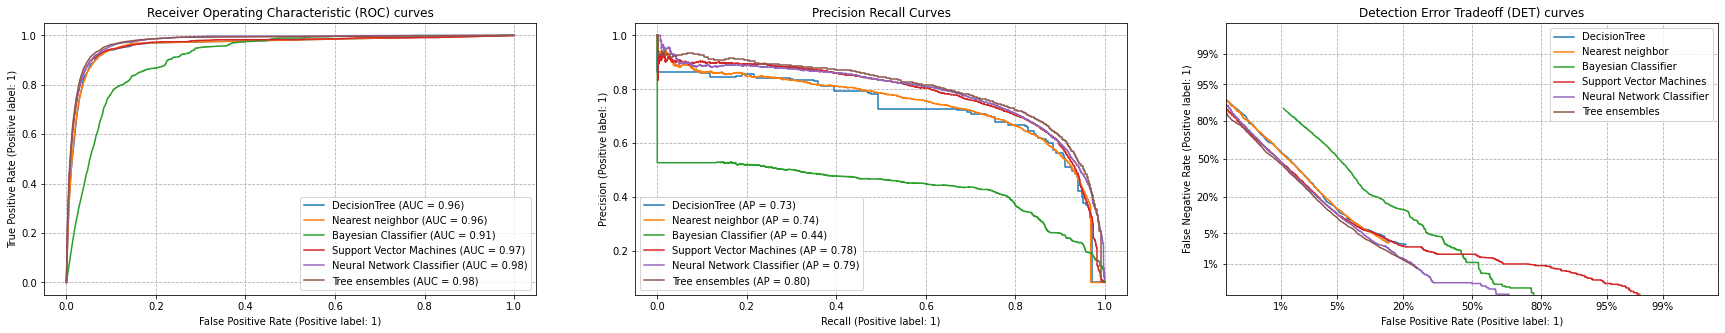

In [36]:
fig, [ax_roc, ax_rec, ax_det] = plt.subplots(1, 3, figsize=(30, 5))

for name, clf in models.items():

    metrics.plot_roc_curve(clf["clf"], X_test_scaled, y_test.ravel(), ax=ax_roc, name=name)
    metrics.plot_det_curve(clf["clf"], X_test_scaled, y_test, ax=ax_det, name=name)
    metrics.plot_precision_recall_curve(clf["clf"], X_test_scaled, y_test, ax=ax_rec, name=name)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_rec.set_title('Precision Recall Curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_rec.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

**Receiver operating characteristic (ROC):** is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

**Precision Recall:** is a useful measure of the success of prediction when the classes are very imbalanced. The precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false-positive rate, and high recall relates to a low false-negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

**Detection error tradeoff (DET):** is a graphical plot of error rates for binary classification systems, plotting the false rejection rate vs. false acceptance rate. The x- and y-axes are scaled non-linearly by their standard normal deviates (or just by logarithmic transformation), yielding tradeoff curves that are more linear than ROC curves, and use most of the image area to highlight the differences of importance in the critical operating region. DET curves give the user direct feedback of the detection error tradeoff to aid in operating point analysis. The user can deduct directly from the DET-curve plot at which rate false-negative error rate will improve when willing to accept an increase in false-positive error rate (or vice-versa).

<div id= 'Balanced'/>

## Balanced dataset

In [31]:
df_balanced = pd.read_csv("/Users/maria/Downloads/train_balanced.csv")

In [32]:
df_balanced_copy=df_balanced.copy()

In [33]:
df_balanced_copy

,Unnamed: 0,session_id,plaform,segment,customer_type,device_group,visitor_type,has_listing,has_used_search,has_recommendation,...,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,is_subscribed,browser_name,country,bought
0,90000,a392f31b-fbe2-474a-be21-b0993ce39050,website,without_segment,prospect,Mobile Web,new,1,1,1,...,1,2766,58,21,8,5,NaN,Apple Mail,US,1
1,90001,40ff2080-12c9-41c8-b730-de882cc863cf,website,FFACCESS-Silver,customer,Mobile Web,returning,1,1,1,...,1,928,19,4,6,2,Yes,Samsung Browser,KR,1
2,90002,d7a372e9-6d4f-4063-9537-51d5e8913f6a,mobile_app,FFACCESS-Private-Client,customer,App,returning,1,1,0,...,1,848,70,6,2,1,Yes,NaN,CN,1
3,90003,88fc6385-98b8-4e46-95f4-22a5ffa428f7,mobile_app,without_segment,customer,App,returning,0,0,0,...,1,243,25,1,1,1,No,NaN,HK,1
4,90004,68998626-90d5-421a-a6e6-0ec8b3f2fd45,mobile_app,without_segment,customer,App,returning,1,0,0,...,1,1806,135,25,14,4,No,NaN,RU,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,78330,9556a789-1ef0-4ce1-a5ec-d3115511cf4d,website,FFACCESS-Silver,customer,Desktop,returning,1,0,1,...,1,548,5,1,1,1,Yes,Chrome,HN,0
15996,49480,6be5907e-5ecf-452d-bdd2-633714fa3d83,website,without_segment,prospect,Desktop,returning,0,0,1,...,0,0,1,1,1,1,NaN,Safari,GB,0
15997,19054,cf2872c1-7a00-4fff-9f58-6f5b1200a57c,website,without_segment,prospect,Mobile Web,new,0,0,0,...,0,0,1,1,1,1,NaN,Safari,IT,0
15998,7735,afaf69e1-a983-45a4-9922-78241e824ecf,website,without_segment,prospect,Mobile Web,new,0,0,0,...,1,0,1,1,1,1,NaN,Chrome,IT,0


**Checking for missing values**

In [34]:
df_balanced_copy.isna().sum()

Unnamed: 0                       0
session_id                       0
plaform                          0
segment                          0
customer_type                    0
device_group                     0
visitor_type                     0
has_listing                      0
has_used_search                  0
has_recommendation               0
has_add_to_wishlist              0
has_add_to_bag                   0
duration                         0
view_qty                         0
unique_product_qty               0
unique_browse_designer_qty       0
unique_browse_category_qty       0
is_subscribed                 6675
browser_name                  6260
country                          0
bought                           0
dtype: int64

In [35]:
df_balanced_copy = df_balanced_copy.drop(columns=["browser_name","country", "is_subscribed", "session_id", "device_group","segment","Unnamed: 0"])

In [36]:
df_balanced_copy

,plaform,customer_type,visitor_type,has_listing,has_used_search,has_recommendation,has_add_to_wishlist,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,bought
0,website,prospect,new,1,1,1,0,1,2766,58,21,8,5,1
1,website,customer,returning,1,1,1,0,1,928,19,4,6,2,1
2,mobile_app,customer,returning,1,1,0,0,1,848,70,6,2,1,1
3,mobile_app,customer,returning,0,0,0,0,1,243,25,1,1,1,1
4,mobile_app,customer,returning,1,0,0,0,1,1806,135,25,14,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,website,customer,returning,1,0,1,0,1,548,5,1,1,1,0
15996,website,prospect,returning,0,0,1,0,0,0,1,1,1,1,0
15997,website,prospect,new,0,0,0,0,0,0,1,1,1,1,0
15998,website,prospect,new,0,0,0,0,1,0,1,1,1,1,0


In [37]:
df_balanced_copy = pd.get_dummies(df_balanced_copy, columns=['plaform', 'customer_type', 'visitor_type'], drop_first=True)

In [38]:
df_balanced_copy

,has_listing,has_used_search,has_recommendation,has_add_to_wishlist,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,bought,plaform_website,customer_type_prospect,visitor_type_returning
0,1,1,1,0,1,2766,58,21,8,5,1,1,1,0
1,1,1,1,0,1,928,19,4,6,2,1,1,0,1
2,1,1,0,0,1,848,70,6,2,1,1,0,0,1
3,0,0,0,0,1,243,25,1,1,1,1,0,0,1
4,1,0,0,0,1,1806,135,25,14,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1,0,1,0,1,548,5,1,1,1,0,1,0,1
15996,0,0,1,0,0,0,1,1,1,1,0,1,1,1
15997,0,0,0,0,0,0,1,1,1,1,0,1,1,0
15998,0,0,0,0,1,0,1,1,1,1,0,1,1,0


In [39]:
X_balanced = df_balanced_copy.drop(["bought"], axis = 1)
y_balanced = df_balanced_copy['bought']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_balanced, y_balanced, random_state = 42, train_size = 0.2)
X_train_scaled_b, X_test_scaled_b = scale(X_train_b), scale(X_test_b)  #standardizes data

y_train_b = y_train_b.astype('int') 
y_test_b = y_test_b.astype('int')

In [48]:
dtc = DecisionTreeClassifier()
cv = ShuffleSplit(n_splits=10, random_state=42)

dtc_params = {"max_depth":range(1,10),
              "min_samples_split":range(1,10),
              "min_samples_leaf":range(1,10),
             }

grid = GridSearchCV(estimator=dtc, param_grid=dtc_params, cv = cv,verbose=1, n_jobs=-1, scoring='accuracy')

grid.fit(X_train_b, y_train_b)

print(grid.best_params_)

Fitting 10 folds for each of 729 candidates, totalling 7290 fits
{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [122]:
knn = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=10, random_state=42)

knn_params = {"n_neighbors":range(1,31),
              "weights": ['uniform','distance'],
              "metric": ['minkowski','euclidean','manhattan'],
             }

grid = GridSearchCV(estimator=knn, param_grid=knn_params, cv = cv,verbose=1, n_jobs=-1, scoring='accuracy')

grid.fit(X_train_b, y_train_b)

print(grid.best_params_)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [123]:
rfc = RandomForestClassifier()
cv = ShuffleSplit(n_splits=10, random_state=42)

rfc_params = {'n_estimators': [50,100,150,200,300,400,500,600,700,800,900,1000], 'max_features':['auto', 'sqrt']}

grid = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv = cv,verbose=1, n_jobs=-1, scoring='accuracy')

grid.fit(X_train_b, y_train_b)

print(grid.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'max_features': 'auto', 'n_estimators': 100}


In [133]:
nnc = MLPClassifier()
cv = ShuffleSplit(n_splits=10, random_state=42)

nnc_params = {'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

grid = GridSearchCV(estimator=nnc, param_grid=nnc_params, cv = cv,verbose=1, n_jobs=-1, scoring='accuracy')

grid.fit(X_train_b, y_train_b)

print(grid.best_params_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


In [40]:
models_balanced = {
    "DecisionTree": {"object": DecisionTreeClassifier(random_state=42,max_depth=7,min_samples_leaf=3,min_samples_split=4)},
    "Nearest neighbor":{"object": KNeighborsClassifier(n_neighbors=9,metric="manhattan",weights="distance")},
    "Bayesian Classifier": {"object": GaussianNB()},
    "Support Vector Machines": {"object": SVC(random_state=42,C=10,gamma="auto",kernel="rbf")},
    "Neural Network Classifier":{"object": MLPClassifier(random_state=42,max_iter=100,activation="tanh",alpha=0.0001,learning_rate="constant",solver="adam",hidden_layer_sizes=(100,50,30))},
    "Tree ensembles":{"object": RandomForestClassifier(n_estimators=100,max_features="auto"),}
   
}

In [41]:
for name, clf_b in models_balanced.items():
  print(f"Model: {name}")
  start = dt.datetime.now() 

  clf_b = models_balanced[name]["object"].fit(X_train_scaled_b, y_train_b)
  y_pred_b = clf_b.predict(X_test_scaled_b)

  models_balanced[name]["pred_balanced"] = y_pred_b
  models_balanced[name]["clf_balanced"] = clf_b

  end = dt.datetime.now()
  print(f"   * Run Time: {end-start}")

Model: DecisionTree
   * Run Time: 0:00:00.042111
Model: Nearest neighbor
   * Run Time: 0:00:01.496498
Model: Bayesian Classifier
   * Run Time: 0:00:00.014248
Model: Support Vector Machines
   * Run Time: 0:00:03.114938
Model: Neural Network Classifier
   * Run Time: 0:00:07.836152
Model: Tree ensembles
   * Run Time: 0:00:01.085951


### Nearest neighbor

In [48]:
knn = KNeighborsClassifier(n_neighbors=9,metric="manhattan",weights="distance")
knn.fit(X_train_scaled_b, y_train_b)
print("score on test: " + str(knn.score(X_test_scaled_b, y_test_b)))
print("score on train: "+ str(knn.score(X_train_scaled_b, y_train_b)))

score on test: 0.90078125
score on train: 0.999375


In [52]:
print("Nearest neighbor accuracy:",metrics.accuracy_score(y_test_b, models_balanced["Nearest neighbor"]["pred_balanced"]))
print("Nearest neighbor precision:",metrics.precision_score(y_test_b, models_balanced["Nearest neighbor"]["pred_balanced"]))
print("Nearest neighbor recall:",metrics.recall_score(y_test_b, models_balanced["Nearest neighbor"]["pred_balanced"]))
print("Nearest neighbor f1-score:",metrics.f1_score(y_test_b, models_balanced["Nearest neighbor"]["pred_balanced"]))

Nearest neighbor accuracy: 0.90078125
Nearest neighbor precision: 0.8873982514320169
Nearest neighbor recall: 0.918408736349454
Nearest neighbor f1-score: 0.9026372278442195


In [53]:
confusion_matrix(y_test_b, models_balanced["Nearest neighbor"]["pred_balanced"])

array([[5643,  747],
       [ 523, 5887]], dtype=int64)

### Bayesian Classifier

In [43]:
bc = GaussianNB()
bc.fit(X_train_scaled_b, y_train_b)
print("score on test: " + str(bc.score(X_test_scaled_b, y_test_b)))
print("score on train: "+ str(bc.score(X_train_scaled_b, y_train_b)))

score on test: 0.83171875
score on train: 0.8359375


In [54]:
print("Bayesian Classifier accuracy:",metrics.accuracy_score(y_test_b, models_balanced["Bayesian Classifier"]["pred_balanced"]))
print("Bayesian Classifier precision:",metrics.precision_score(y_test_b, models_balanced["Bayesian Classifier"]["pred_balanced"]))
print("Bayesian Classifier recall:",metrics.recall_score(y_test_b, models_balanced["Bayesian Classifier"]["pred_balanced"]))
print("Bayesian Classifier f1-score:",metrics.f1_score(y_test_b, models_balanced["Bayesian Classifier"]["pred_balanced"]))

Bayesian Classifier accuracy: 0.83171875
Bayesian Classifier precision: 0.8820466786355475
Bayesian Classifier recall: 0.7664586583463339
Bayesian Classifier f1-score: 0.8202003338898163


In [55]:
confusion_matrix(y_test_b, models_balanced["Bayesian Classifier"]["pred_balanced"])

array([[5733,  657],
       [1497, 4913]], dtype=int64)

### Decision Trees

In [49]:
dtc = DecisionTreeClassifier(random_state=42,max_depth=7,min_samples_leaf=3,min_samples_split=4)
dtc.fit(X_train_scaled_b, y_train_b)
print("score on test: " + str(dtc.score(X_test_scaled_b, y_test_b)))
print("score on train: "+ str(dtc.score(X_train_scaled_b, y_train_b)))

score on test: 0.910078125
score on train: 0.946875


In [56]:
print("DecisionTree accuracy:",metrics.accuracy_score(y_test_b, models_balanced["DecisionTree"]["pred_balanced"]))
print("DecisionTree precision:",metrics.precision_score(y_test_b, models_balanced["DecisionTree"]["pred_balanced"]))
print("DecisionTree recall:",metrics.recall_score(y_test_b, models_balanced["DecisionTree"]["pred_balanced"]))
print("DecisionTree f1-score:",metrics.f1_score(y_test_b, models_balanced["DecisionTree"]["pred_balanced"]))

DecisionTree accuracy: 0.910078125
DecisionTree precision: 0.8964269561284487
DecisionTree recall: 0.927613104524181
DecisionTree f1-score: 0.9117534309591352


In [57]:
confusion_matrix(y_test_b, models_balanced["DecisionTree"]["pred_balanced"])

array([[5703,  687],
       [ 464, 5946]], dtype=int64)

### Tree Ensembles

In [45]:
rfc = RandomForestClassifier(n_estimators=150,max_features="auto")
rfc.fit(X_train_scaled_b, y_train_b)
print("score on test: " + str(rfc.score(X_test_scaled_b, y_test_b)))
print("score on train: "+ str(rfc.score(X_train_scaled_b, y_train_b)))

score on test: 0.931796875
score on train: 0.999375


In [58]:
print("Tree ensembles accuracy:",metrics.accuracy_score(y_test_b, models_balanced["Tree ensembles"]["pred_balanced"]))
print("Tree ensembles precision:",metrics.precision_score(y_test_b, models_balanced["Tree ensembles"]["pred_balanced"]))
print("Tree ensembles recall:",metrics.recall_score(y_test_b, models_balanced["Tree ensembles"]["pred_balanced"]))
print("Tree ensembles f1-score:",metrics.f1_score(y_test_b, models_balanced["Tree ensembles"]["pred_balanced"]))

Tree ensembles accuracy: 0.930390625
Tree ensembles precision: 0.9118042083271154
Tree ensembles recall: 0.953198127925117
Tree ensembles f1-score: 0.9320417969643812


In [59]:
confusion_matrix(y_test_b, models_balanced["Tree ensembles"]["pred_balanced"])

array([[5799,  591],
       [ 300, 6110]], dtype=int64)

### Support Vector Machines

In [46]:
svc = SVC(random_state=42,C=10,gamma="auto",kernel="rbf")
svc.fit(X_train_scaled_b, y_train_b)
print("score on test: " + str(svc.score(X_test_scaled_b, y_test_b)))
print("score on train: "+ str(svc.score(X_train_scaled_b, y_train_b)))

score on test: 0.920234375
score on train: 0.9496875


In [60]:
print("Support Vector Machines accuracy:",metrics.accuracy_score(y_test_b, models_balanced["Support Vector Machines"]["pred_balanced"]))
print("Support Vector Machines precision:",metrics.precision_score(y_test_b, models_balanced["Support Vector Machines"]["pred_balanced"]))
print("Support Vector Machines recall:",metrics.recall_score(y_test_b, models_balanced["Support Vector Machines"]["pred_balanced"]))
print("Support Vector Machines f1-score:",metrics.f1_score(y_test_b, models_balanced["Support Vector Machines"]["pred_balanced"]))

Support Vector Machines accuracy: 0.920234375
Support Vector Machines precision: 0.9075782786265315
Support Vector Machines recall: 0.9360374414976599
Support Vector Machines f1-score: 0.921588203670993


In [61]:
confusion_matrix(y_test_b, models_balanced["Support Vector Machines"]["pred_balanced"])

array([[5779,  611],
       [ 410, 6000]], dtype=int64)

### Neural Network Classifier

In [47]:
mlp = MLPClassifier(random_state=42,max_iter=100,activation="tanh",alpha=0.0001,learning_rate="constant",solver="adam",hidden_layer_sizes=(100,50,30))
mlp.fit(X_train_scaled_b, y_train_b)
print("score on test: " + str(mlp.score(X_test_scaled_b, y_test_b)))
print("score on train: "+ str(mlp.score(X_train_scaled_b, y_train_b)))

score on test: 0.928828125
score on train: 0.9575


In [62]:
print("Neural Network Classifier accuracy:",metrics.accuracy_score(y_test_b, models_balanced["Neural Network Classifier"]["pred_balanced"]))
print("Neural Network Classifier precision:",metrics.precision_score(y_test_b, models_balanced["Neural Network Classifier"]["pred_balanced"]))
print("Neural Network Classifier recall:",metrics.recall_score(y_test_b, models_balanced["Neural Network Classifier"]["pred_balanced"]))
print("Neural Network Classifier f1-score:",metrics.f1_score(y_test_b, models_balanced["Neural Network Classifier"]["pred_balanced"]))

Neural Network Classifier accuracy: 0.928828125
Neural Network Classifier precision: 0.9146433418790529
Neural Network Classifier recall: 0.9461778471138845
Neural Network Classifier f1-score: 0.9301433939115099


In [63]:
confusion_matrix(y_test_b, models_balanced["Neural Network Classifier"]["pred_balanced"])

array([[5824,  566],
       [ 345, 6065]], dtype=int64)

### Graphic visualization

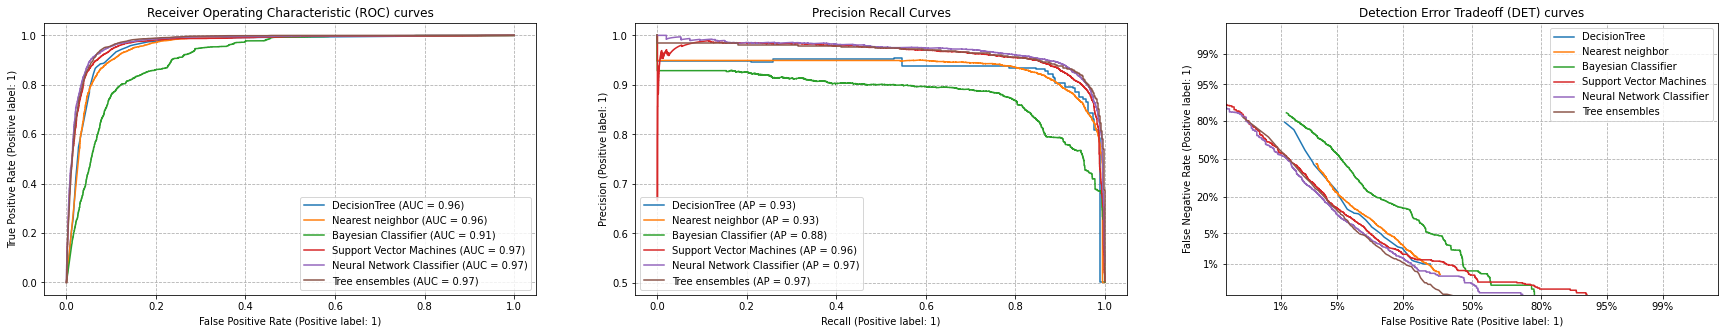

In [64]:
fig, [ax_roc, ax_rec, ax_det] = plt.subplots(1, 3, figsize=(30, 5))

for name, clf in models_balanced.items():

    metrics.plot_roc_curve(clf["clf_balanced"], X_test_scaled_b, y_test_b.ravel(), ax=ax_roc, name=name)
    metrics.plot_det_curve(clf["clf_balanced"], X_test_scaled_b, y_test_b, ax=ax_det, name=name)
    metrics.plot_precision_recall_curve(clf["clf_balanced"], X_test_scaled_b, y_test_b, ax=ax_rec, name=name)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_rec.set_title('Precision Recall Curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_rec.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

### Full dataset without the sessions with duration of zero

We applied the models to the full dataset but without the zeros of duration because, in our opinion, it's absurd to have sessions with a duration of zero. 

**How do sessions with zero seconds help us understand customer behavior?** The only thing we think we can take from this is that those people probably entered the website by mistake and quickly left. Almost half of the values of duration were zero. 

The professor advised not to cut outliers or tamper with the data, and we have done that in the first attempt of modeling our data of the full dataset, but we just tried to take the zeros of the duration variable just to compare to what we have done above.

Since we didn't want to overload the notebook or the professors, we removed the code that corresponds to this part and just put the results in our final tables.

<div id= 'Comparison'/>

## Comparison of models

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\maria\pycharmprojects\assig_ds\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [91]:
from tabulate import tabulate

In [97]:
print('\033[1m' + 'ACCURACY TABLE' + '\033[0m')
#create data
data = [["Balanced", 0.90078125,0.910078125,0.83171875], 
        ["Full", 0.9516184210526316,0.9515131578947369,0.8994078947368421], 
        ["Full_wihout_duration_zeros", 0.9101873235822427,0.9172323698882591,0.8567896050575035]] 
        
  
#define header names
col_names = ["DataSet", "Nearest neighbor", "Decision Tree", "Bayesian Classifier"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

data2 = [["Balanced",0.920234375,0.928828125,0.930390625], 
        ["Full",0.9559342105263158,0.9571315789473684,0.9580921052631579], 
        ["Full_wihout_duration_zeros",0.9239041687078638,0.9282198427694963,0.9235309212214524]] 
        
  
#define header names
col_names = ["DataSet","Support Vector Machines","Neural Network Classifier","Tree ensembles" ]
  
#display table
print(tabulate(data2, headers=col_names, tablefmt="fancy_grid"))

ACCURACY TABLE
╒════════════════════════════╤════════════════════╤═════════════════╤═══════════════════════╕
│ DataSet                    │   Nearest neighbor │   Decision Tree │   Bayesian Classifier │
╞════════════════════════════╪════════════════════╪═════════════════╪═══════════════════════╡
│ Balanced                   │           0.900781 │        0.910078 │              0.831719 │
├────────────────────────────┼────────────────────┼─────────────────┼───────────────────────┤
│ Full                       │           0.951618 │        0.951513 │              0.899408 │
├────────────────────────────┼────────────────────┼─────────────────┼───────────────────────┤
│ Full_wihout_duration_zeros │           0.910187 │        0.917232 │              0.85679  │
╘════════════════════════════╧════════════════════╧═════════════════╧═══════════════════════╛
╒════════════════════════════╤═══════════════════════════╤═════════════════════════════╤══════════════════╕
│ DataSet                    │ 

In [98]:
print('\033[1m' + 'PRECISION TABLE' + '\033[0m')
#create data
data = [["Balanced", 0.8873982514320169,0.8964269561284487,0.8820466786355475], 
        ["Full", 0.7309861562126132,0.7156345015202432,0.4365660415204092], 
        ["Full_wihout_duration_zeros", 0.7175170068027211,0.7270562083201016,0.5210980392156863]] 
        
  
#define header names
col_names = ["DataSet", "Nearest neighbor", "Decision Tree", "Bayesian Classifier"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

data2 = [["Balanced",0.9075782786265315,0.9146433418790529,0.9118042083271154], 
        ["Full",0.7794578646505624,0.7713838664812239,0.7734040732500428], 
        ["Full_wihout_duration_zeros",0.7811941365749017,0.7494383705256852,0.75096215522771]] 
        
  
#define header names
col_names = ["DataSet","Support Vector Machines","Neural Network Classifier","Tree ensembles" ]
  
#display table
print(tabulate(data2, headers=col_names, tablefmt="fancy_grid"))

PRECISION TABLE
╒════════════════════════════╤════════════════════╤═════════════════╤═══════════════════════╕
│ DataSet                    │   Nearest neighbor │   Decision Tree │   Bayesian Classifier │
╞════════════════════════════╪════════════════════╪═════════════════╪═══════════════════════╡
│ Balanced                   │           0.887398 │        0.896427 │              0.882047 │
├────────────────────────────┼────────────────────┼─────────────────┼───────────────────────┤
│ Full                       │           0.730986 │        0.715635 │              0.436566 │
├────────────────────────────┼────────────────────┼─────────────────┼───────────────────────┤
│ Full_wihout_duration_zeros │           0.717517 │        0.727056 │              0.521098 │
╘════════════════════════════╧════════════════════╧═════════════════╧═══════════════════════╛
╒════════════════════════════╤═══════════════════════════╤═════════════════════════════╤══════════════════╕
│ DataSet                    │

In [99]:
print('\033[1m' + 'RECALL TABLE' + '\033[0m')
#create data
data = [["Balanced", 0.918408736349454,0.927613104524181,0.7664586583463339], 
        ["Full", 0.6703761755485893,0.7009404388714734,0.6822884012539185], 
        ["Full_wihout_duration_zeros", 0.6583957553058677,0.7145755305867666,0.5184144818976280]] 
        
  
#define header names
col_names = ["DataSet", "Nearest neighbor", "Decision Tree", "Bayesian Classifier"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

data2 = [["Balanced",0.9360374414976599,0.9461778471138845,0.953198127925117], 
        ["Full",0.662539184952978,0.6954545454545454,0.708307210031348], 
        ["Full_wihout_duration_zeros",0.681960049937578,0.7808988764044944,0.7308052434456929]] 
        
  
#define header names
col_names = ["DataSet","Support Vector Machines","Neural Network Classifier","Tree ensembles" ]
  
#display table
print(tabulate(data2, headers=col_names, tablefmt="fancy_grid"))

RECALL TABLE
╒════════════════════════════╤════════════════════╤═════════════════╤═══════════════════════╕
│ DataSet                    │   Nearest neighbor │   Decision Tree │   Bayesian Classifier │
╞════════════════════════════╪════════════════════╪═════════════════╪═══════════════════════╡
│ Balanced                   │           0.918409 │        0.927613 │              0.766459 │
├────────────────────────────┼────────────────────┼─────────────────┼───────────────────────┤
│ Full                       │           0.670376 │        0.70094  │              0.682288 │
├────────────────────────────┼────────────────────┼─────────────────┼───────────────────────┤
│ Full_wihout_duration_zeros │           0.658396 │        0.714576 │              0.518414 │
╘════════════════════════════╧════════════════════╧═════════════════╧═══════════════════════╛
╒════════════════════════════╤═══════════════════════════╤═════════════════════════════╤══════════════════╕
│ DataSet                    │   

In [100]:
print('\033[1m' + 'F1-SCORE TABLE' + '\033[0m')
#create data
data = [["Balanced", 0.9026372278442195,0.9117534309591352,0.8202003338898163], 
        ["Full", 0.6993704521298341,0.7082112597988756,0.5324444988074124], 
        ["Full_wihout_duration_zeros", 0.6866861979166667,0.7207618447977333,0.5197527966830948]] 
        
  
#define header names
col_names = ["DataSet", "Nearest neighbor", "Decision Tree", "Bayesian Classifier"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

data2 = [["Balanced",0.921588203670993,0.9301433939115099,0.9320417969643812], 
        ["Full",0.7162585783275438,0.7314540059347181,0.7394256729117238], 
        ["Full_wihout_duration_zeros",0.7282119646725546,0.7648452426442491,0.7407465991774755]] 
        
  
#define header names
col_names = ["DataSet","Support Vector Machines","Neural Network Classifier","Tree ensembles" ]
  
#display table
print(tabulate(data2, headers=col_names, tablefmt="fancy_grid"))

F1-SCORE TABLE
╒════════════════════════════╤════════════════════╤═════════════════╤═══════════════════════╕
│ DataSet                    │   Nearest neighbor │   Decision Tree │   Bayesian Classifier │
╞════════════════════════════╪════════════════════╪═════════════════╪═══════════════════════╡
│ Balanced                   │           0.902637 │        0.911753 │              0.8202   │
├────────────────────────────┼────────────────────┼─────────────────┼───────────────────────┤
│ Full                       │           0.69937  │        0.708211 │              0.532444 │
├────────────────────────────┼────────────────────┼─────────────────┼───────────────────────┤
│ Full_wihout_duration_zeros │           0.686686 │        0.720762 │              0.519753 │
╘════════════════════════════╧════════════════════╧═════════════════╧═══════════════════════╛
╒════════════════════════════╤═══════════════════════════╤═════════════════════════════╤══════════════════╕
│ DataSet                    │ 

<div id= 'EvalConcl'/>

# 6. Evaluation and Main Conclusions


The models applied to the full dataset and the balanced dataset provided us with **good results**, indicating that we could leave the datasets as they were and not remove more information. So in our final analysis, we will not consider the full dataset without the zeros of duration. 

**• What is the best model and the recommended data science procedure for the business?**

In terms of **accuracy**, the **full dataset** got **higher scores** when compared to the balanced dataset, but they both got pretty high scores. But accuracy can be misleading. Sometimes it may be desirable to select a model with a lower accuracy because it has a greater predictive power on the problem.
When it comes to the **precision, recall and f1-scores**, the **balanced dataset won that battle**, as we were expecting.

The majority of the models/classifiers had **no overfitting tendencies**, had pretty **fast run times** and more or less showed the **same results**, with the exception of the Bayesian Classifier, which showed worst results.

The models that showed the **best results** were the **Neural Network Classifier** and the **Tree Ensembles**, but if we had to choose one, we would choose the **Neural Network Classifier**.

Neural networks can model data that have nonlinear relationships between variables and can handle interactions between variables, combining them multiple times in order to explain one or more outcomes.

Neural networks have the advantage of learning by themselves by figuring out what they got wrong and then working backward into the algorithm to discover what values and connections made the output incorrect. They can produce an output that is not limited to the input provided to them. 

The input is stored in its own networks, therefore, the loss of data does not affect its working.

- So, the best dataset is the balanced data set and for analyzing and predicting the data, the best model is the Neural Network Classifier

**Best dataset:** Balanced

**Best Model:** Neural Network Classifier

**What do you think that the business can gain from your data science effort?**

By exploring the data obtained by the company through analysis, preparation and visualization of that data, the company can get an insight of the behaviour into their customers or future customers. 

Our analysis provided information about people's behavior when entering the website of the company. We detected certain patterns that could help the company predict if the person using the website is going to buy a luxury item.

If a company understands customer behavior, it will most likely improve its sales by trying different strategic approaches.

<div id= 'Bonus'/>

# 7. Bonus

**AdaBoost** was used, but it did not improve the results we obtained.